In [1]:
import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("data")


In [2]:
import os

os.listdir("data")


['Amazon Sale Report.csv',
 'Cloud Warehouse Compersion Chart.csv',
 'Expense IIGF.csv',
 'International sale Report.csv',
 'May-2022.csv',
 'P  L March 2021.csv',
 'Sale Report.csv']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,5)


In [4]:
df = pd.read_csv("data/Amazon Sale Report.csv")
df.head()


C:\Users\SRIVALLI\AppData\Local\Temp\ipykernel_28232\3743112514.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.shape


(128975, 24)

In [6]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
df.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 22'], inplace=True, errors='ignore')


In [10]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\SRIVALLI\AppData\Local\Temp\ipykernel_28232\3386729631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
df.fillna("Unknown", inplace=True)


C:\Users\SRIVALLI\AppData\Local\Temp\ipykernel_28232\4174812867.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


In [12]:
df['Month'] = df['Date'].dt.month


In [13]:
df['Order ID'].nunique()


120378

In [14]:
df['Status'].value_counts()


Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [15]:
df['Category'].value_counts().head(10)


Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

In [16]:
df['Fulfilment'].value_counts()


Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64

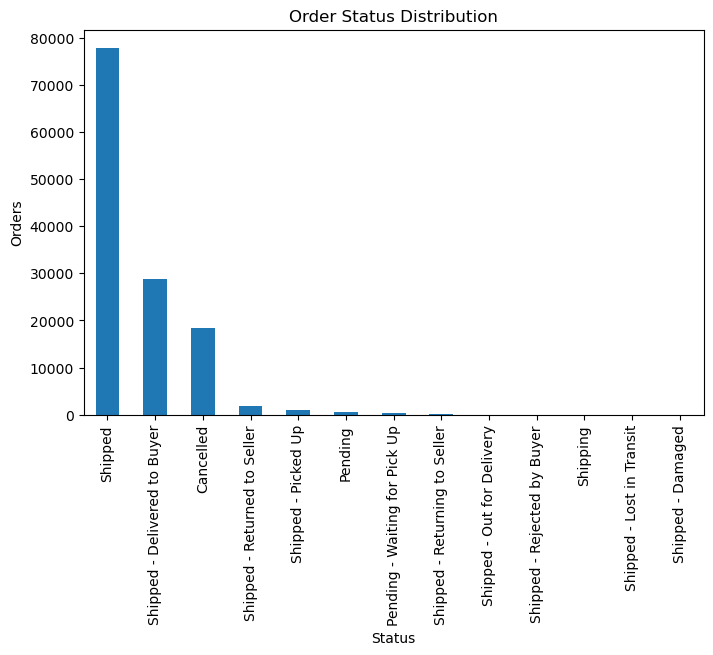

In [17]:
df['Status'].value_counts().plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Orders")
plt.show()


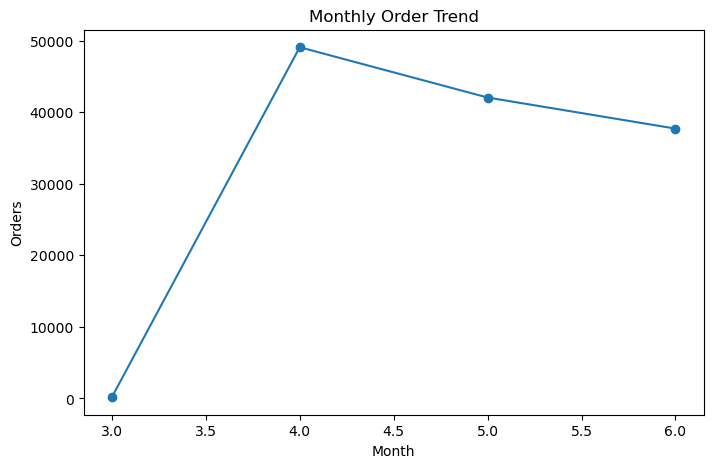

In [18]:
df.groupby('Month')['Order ID'].count().plot(marker='o')
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.show()


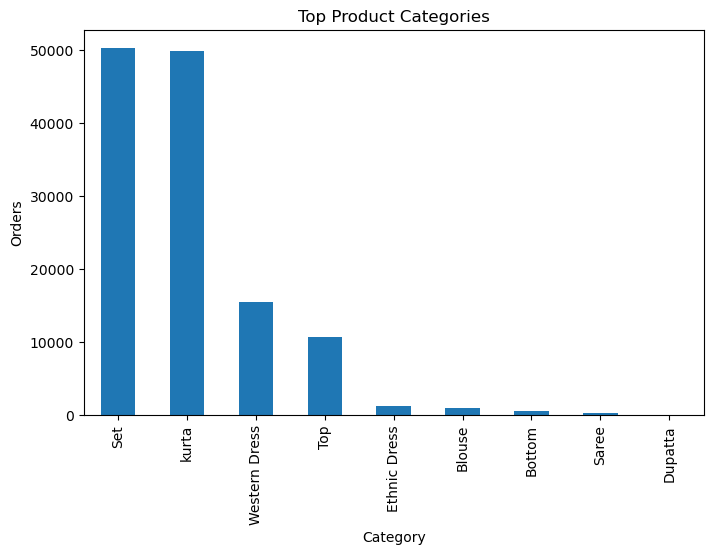

In [19]:
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top Product Categories")
plt.xlabel("Category")
plt.ylabel("Orders")
plt.show()


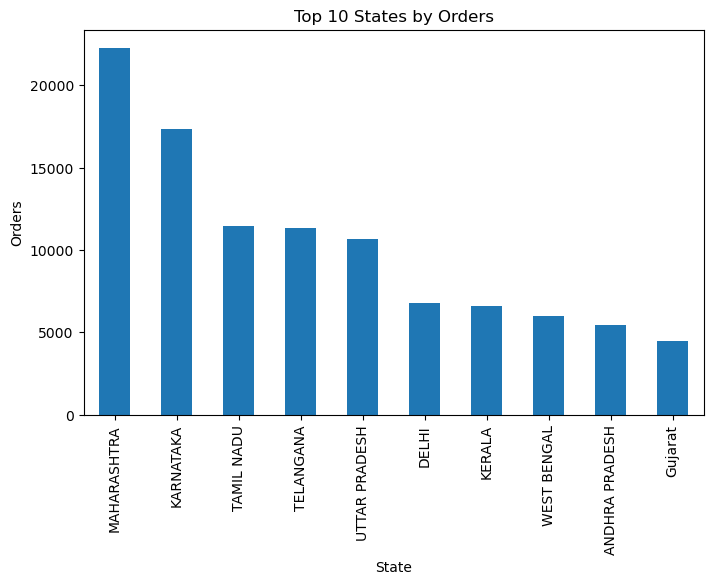

In [20]:
df['ship-state'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 States by Orders")
plt.xlabel("State")
plt.ylabel("Orders")
plt.show()


In [23]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Month'],
      dtype='object')

In [24]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [25]:
df['Amount'].isnull().sum()


np.int64(7795)

In [26]:
df['Amount'].fillna(0, inplace=True)


C:\Users\SRIVALLI\AppData\Local\Temp\ipykernel_28232\1193911185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(0, inplace=True)


In [27]:
total_revenue = df['Amount'].sum()
total_revenue


np.float64(78592678.3)

In [28]:
monthly_revenue = df.groupby('Month')['Amount'].sum()
monthly_revenue


Month
3      101683.85
4    28838708.32
5    26226476.75
6    23425809.38
Name: Amount, dtype: float64

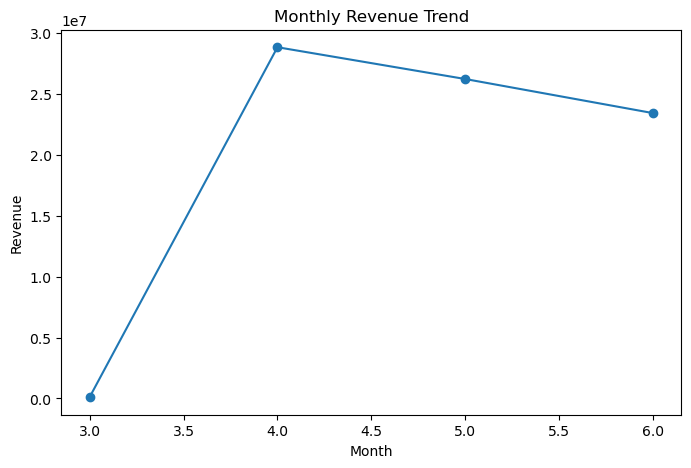

In [29]:
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [30]:
category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_revenue.head(10)


Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64

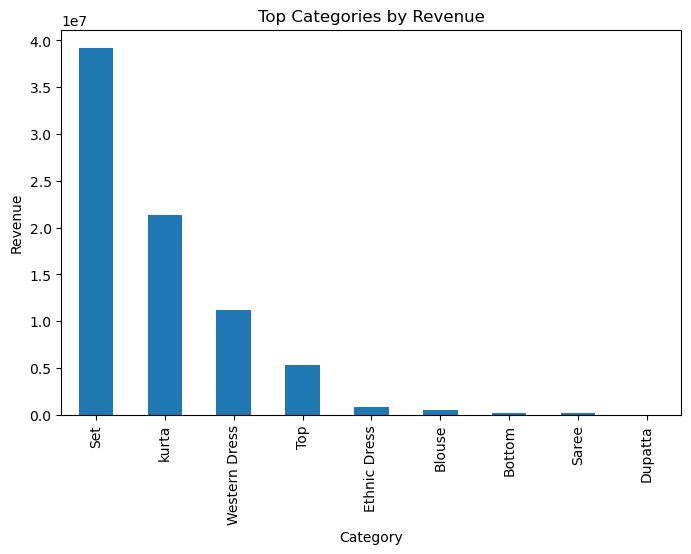

In [31]:
category_revenue.head(10).plot(kind='bar')
plt.title("Top Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


In [32]:
state_revenue = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
state_revenue.head(10)


ship-state
MAHARASHTRA       13335534.14
KARNATAKA         10481114.37
TELANGANA          6916615.65
UTTAR PRADESH      6816642.08
TAMIL NADU         6515650.11
DELHI              4235215.97
KERALA             3830227.58
WEST BENGAL        3507880.44
ANDHRA PRADESH     3219831.72
HARYANA            2882092.99
Name: Amount, dtype: float64

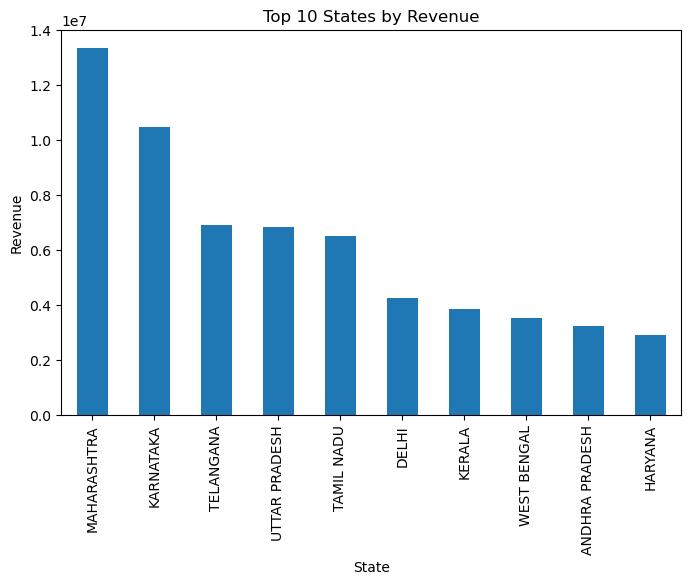

In [33]:
state_revenue.head(10).plot(kind='bar')
plt.title("Top 10 States by Revenue")
plt.xlabel("State")
plt.ylabel("Revenue")
plt.show()


In [67]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Month', 'Sales_Type'],
      dtype='object')

In [68]:
df['Fulfilment'].value_counts()


Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64

In [69]:
pd.crosstab(df['Fulfilment'], df['Status'])


Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
Fulfilment,,,,,,,,,,,,,
Amazon,11471,415,0,77804,0,0,0,0,0,0,0,0,8
Merchant,6861,243,281,0,1,28769,5,35,973,11,1953,145,0


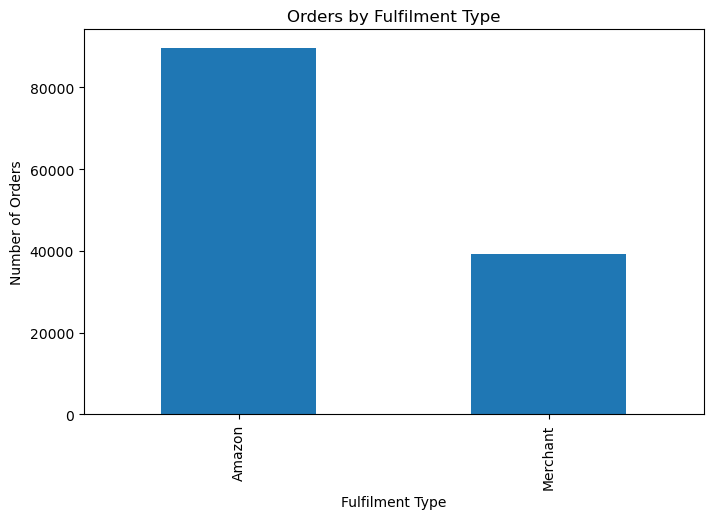

In [70]:
df['Fulfilment'].value_counts().plot(kind='bar')
plt.title("Orders by Fulfilment Type")
plt.xlabel("Fulfilment Type")
plt.ylabel("Number of Orders")
plt.show()


In [71]:
df['Status'].value_counts()


Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [72]:
total_orders = len(df)
cancelled_orders = df[df['Status'].str.contains('Cancel', case=False)].shape[0]

(cancelled_orders / total_orders) * 100


14.213607288234154

In [73]:
df.groupby('Fulfilment')['Amount'].sum()


Fulfilment
Amazon      54322151.0
Merchant    24270527.3
Name: Amount, dtype: float64

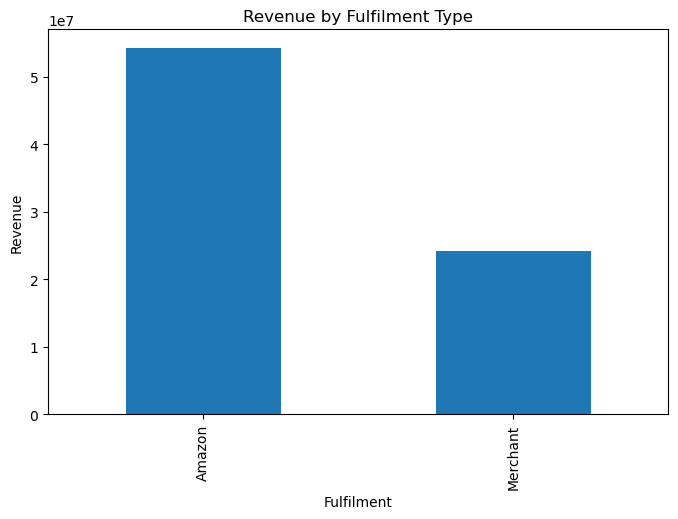

In [74]:
df.groupby('Fulfilment')['Amount'].sum().plot(kind='bar')
plt.title("Revenue by Fulfilment Type")
plt.xlabel("Fulfilment")
plt.ylabel("Revenue")
plt.show()


In [75]:
df[df['Status'].str.contains('Cancel', case=False)]['Category'].value_counts().head(10)


Category
Set              7337
kurta            7255
Western Dress    2122
Top              1276
Ethnic Dress      145
Blouse            116
Bottom             60
Saree              21
Name: count, dtype: int64

In [76]:
import os
os.getcwd()


'C:\\Users\\SRIVALLI\\Desktop'